# Script 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
books=cv2.imread('C:/Users/walik/CV/CV KBTU 2023/Lectures/04-Object-Detection/MyData/msg-657138491-77522.jpg',0)

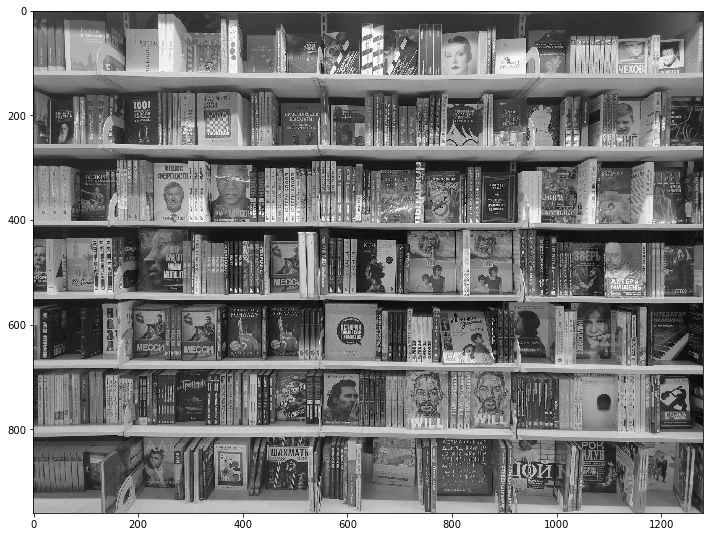

In [4]:
display(books)

In [5]:
book=cv2.imread('C:/Users/walik/CV/CV KBTU 2023/Lectures/04-Object-Detection/MyData/msg-657138491-77566.jpg',0)

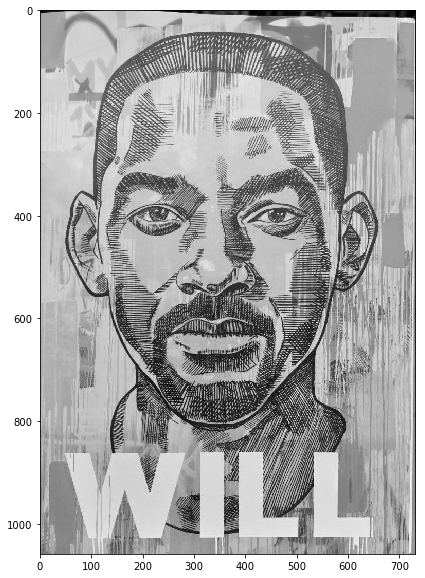

In [6]:
display(book)

In [116]:
# Create SIFT Object
sift=cv2.xfeatures2d.SIFT_create()

# # find the keypoints and descriptors with ORB
kp1,des1=sift.detectAndCompute(book,None)
kp2,des2=sift.detectAndCompute(books,None)

# FLANN parameters
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

flann=cv2.FlannBasedMatcher(index_params,search_params)

matches=flann.knnMatch(des1,des2,k=2)

good=[]
# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.58*match2.distance:
        good.append([match1])
        
flann_matches=cv2.drawMatchesKnn(book,kp1,books,kp2,good,None,flags=2)

In [117]:
len(good)

29

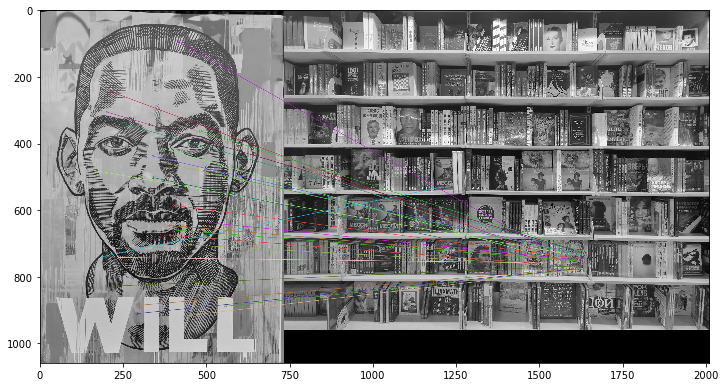

In [118]:
display(flann_matches)

# Script 2

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def create_rgb(i):
    x=np.array(cm.tab10(i))[:3]*255
    return tuple(x)

def mouse_callback(event,x,y,flags,param):
    global marks_updated 

    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)
            
        cv2.circle(photo_copy,(x,y),10,colors[current_marker],-1)
        marks_updated=True

        
photo=cv2.imread('C:/Users/walik/CV/CV KBTU 2023/Lectures/04-Object-Detection/MyData/photo1677151269.jpeg')
photo_copy=np.copy(photo)

marker_image=np.zeros(photo.shape[:2],dtype=np.int32)
segments=np.zeros(photo.shape,dtype=np.uint8)

colors=[]  

for i in range(10):
    colors.append(create_rgb(i))

n_markers=10

current_marker=1
marks_updated=False        
        
cv2.namedWindow('Photo Image')
cv2.setMouseCallback('Photo Image',mouse_callback)

while True:    
    # Show the 2 windows
    cv2.imshow('WaterShed Segments',segments)
    cv2.imshow('Photo Image',photo_copy)

    k=cv2.waitKey(1)

    if k==27:
        break
        
    elif k==ord('c'):
        photo_copy=photo.copy()
        marker_image=np.zeros(photo.shape[0:2],dtype=np.int32)
        segments=np.zeros(photo.shape,dtype=np.uint8)
       
    elif k>0 and chr(k).isdigit():      
        current_marker=int(chr(k))
   
    if marks_updated:
        marker_image_copy=marker_image.copy()
        cv2.watershed(photo,marker_image_copy)
        
        segments=np.zeros(photo.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)]=colors[color_ind]
        
        marks_updated=False
        
cv2.destroyAllWindows()

# Script 3

In [13]:
import cv2

eye_cascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA/DATA/haarcascades/haarcascade_eye.xml')
face_cascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA//DATA/haarcascades/haarcascade_frontalface_default.xml')
smile_cascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA//DATA/haarcascades/haarcascade_smile.xml')
mouth_cascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA//DATA/haarcascades/haarcascade_mcs_mouth.xml')
nose_cascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA//DATA/haarcascades/haarcascade_mcs_nose.xml')

def detect_face(img):
    face_img=img.copy()
    
    face_rects=face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,255),5)
        
    return face_img

def detect_eye(img):
    face_img=img.copy()
    
    eyes=eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=20)
    
    for (x,y,w,h) in eyes:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,0),5)
        
    return face_img

def detect_nose(img):
    face_img=img.copy()
    
    face_rects=nose_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=15)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
        
    return face_img
        
def detect_mouth(img):
    face_img=img.copy()
    
    face_rects=mouth_cascade.detectMultiScale(face_img,scaleFactor=1.5,minNeighbors=25)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,0,255),5)
        
    return face_img

def detect_smile(img):
    face_img=img.copy()
    
    face_rects=smile_cascade.detectMultiScale(face_img,scaleFactor=1.8,minNeighbors=50)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),5)
        
    return face_img

cap=cv2.VideoCapture(0)

while True: 
    ret,frame=cap.read(0)
    
    frame1=detect_nose(frame)
    frame2=detect_face(frame)
    frame3=detect_eye(frame)
    frame4=detect_mouth(frame)
    frame=frame1+frame2+frame3+frame4
    
    #frame=detect_smile(frame)
    
    cv2.imshow('Face Detection',frame)
    
    c=cv2.waitKey(1)
    if c==27:
        break
        
cap.release()
cv2.destroyAllWindows()

# Script 4

In [63]:
import cv2
import time

haarcascade=cv2.CascadeClassifier('C:/Users/walik/CV/DATA/DATA/haarcascades/haarcascade_russian_plate_number.xml')

def detect_and_blur_plate(fr):
    fr_copy=fr.copy()
    
    plate=haarcascade.detectMultiScale(fr_copy,scaleFactor=2,minNeighbors=3)
    
    for (x,y,w,h) in plate:
        plate_part=fr_copy[y:y+h,x:x+w]
        blured=cv2.medianBlur(plate_part,25)
        fr_copy[y:y+h,x:x+w]=blured
        
    return fr_copy

cap=cv2.VideoCapture('C:/Users/walik/CV/CV KBTU 2023/Lectures/04-Object-Detection/MyData/video5451772546259101207.mp4')

fps=30

while cap.isOpened():         
    ret,frame=cap.read()
    
    frame=detect_and_blur_plate(frame)
    
    frame=cv2.resize(frame,(1366,710))
    
    if ret==True:             
        time.sleep(1/fps)
        cv2.imshow('frame',frame)
        if cv2.waitKey(25)&0xFF==ord('q'):            
            break 
    else:
        break
        
cap.release()
cv2.destroyAllWindows()